In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Pre-Processing

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(149, 5)

In [11]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df = df.copy()
df['species'] = label.fit_transform(df['species'])
# 0 = setosa , 1 = versicolor , 2 = virginica


In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## EDA

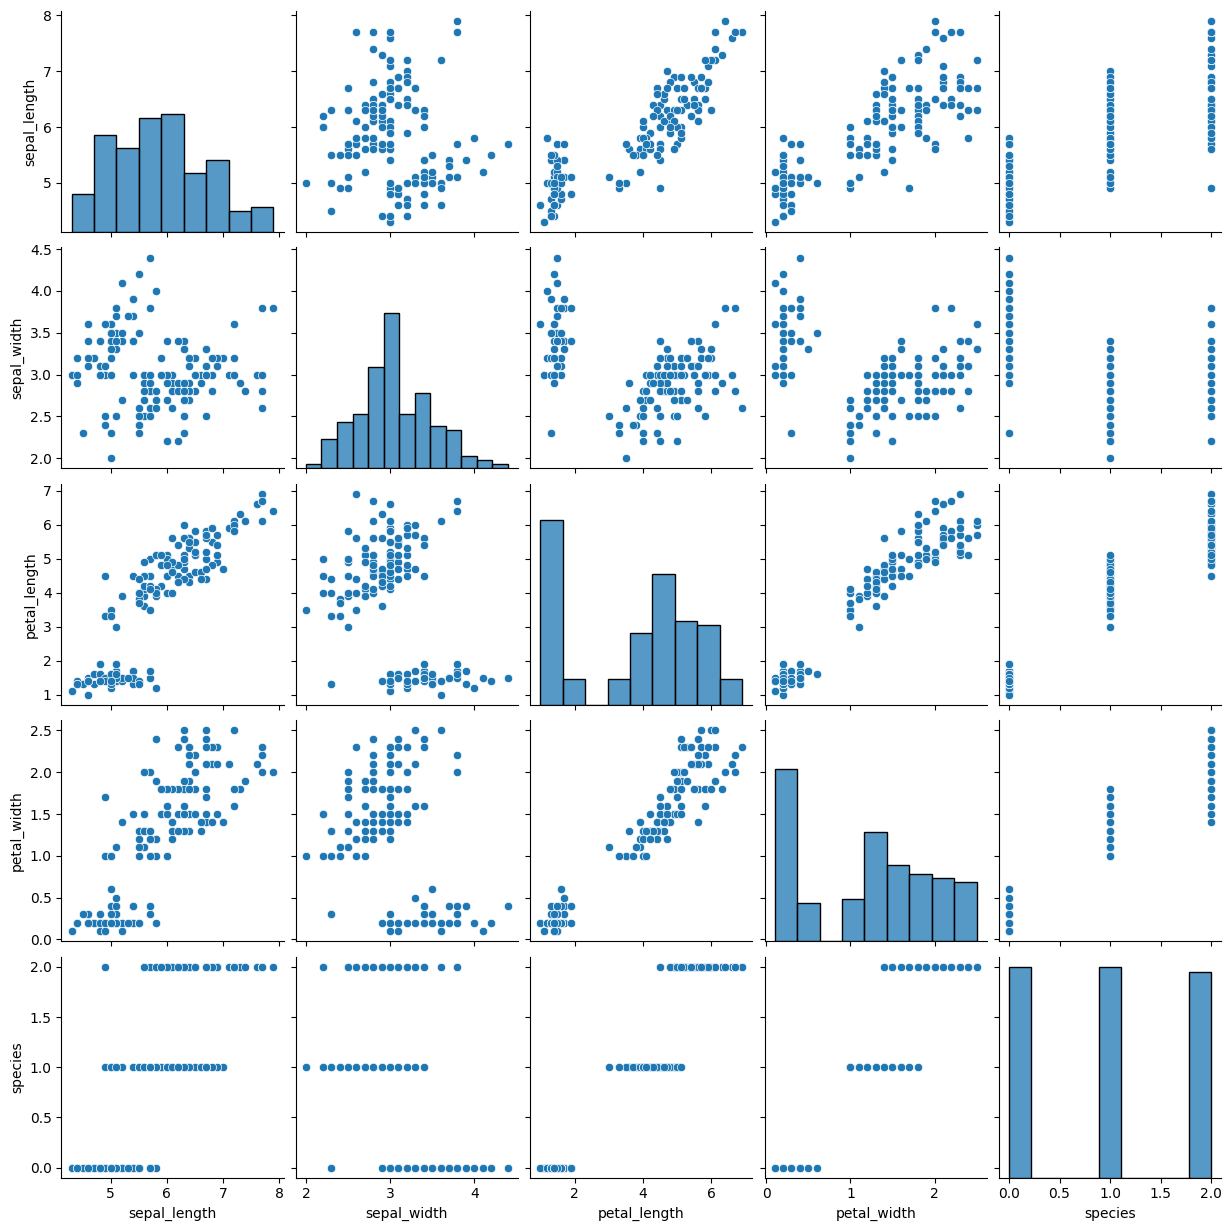

In [19]:
sns.pairplot(df)

<Axes: >

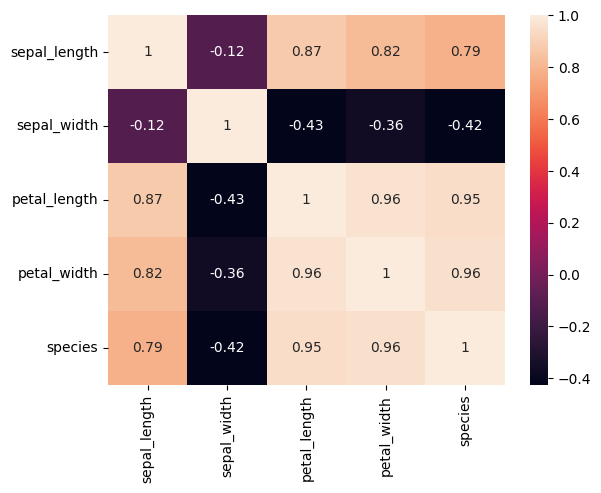

In [25]:
sns.heatmap(df.corr(),annot=True)

In [24]:
df['species'].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

## Implementation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [27]:
X = df.drop('species',axis=1)
y = df['species']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=41,test_size=0.2)

In [33]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.73      0.89      0.80         9
           2       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.88      0.87      0.87        30



In [34]:
RD = RandomForestClassifier()
RD.fit(X_train,y_train)

y_pred = RD.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.73      0.89      0.80         9
           2       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.88      0.87      0.87        30



In [35]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

y_pred = KNN.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### High accuracy found on KNN and RandomForest so proceding to do Hyper parameter Tuning on Both

In [36]:
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  
}

In [37]:
from sklearn.model_selection import GridSearchCV

KNN_v2 = GridSearchCV(KNN,param_grid,n_jobs=-1,cv=2)

In [38]:
KNN_v2.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [39]:
y_pred = KNN_v2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [40]:
KNN_v2.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance')

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]  
}

In [42]:
RD_v2 = GridSearchCV(RD,param_grid,n_jobs=-1)
RD_v2.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [44]:
y_pred = RD_v2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [45]:
RD_v2.best_estimator_

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=10,
                       n_estimators=50)

### Same accuracy on KNN and Random Forest Will be using Random Forest because of its efficiency 

### Preparing for Model Deployment 

In [ ]:
import joblib

joblib.dump(RD_v2,"IRIS_Model.joblib")

['IRIS_Model.joblib']